# Austin data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
# # Google developer API key
# from config import gkey

# # Access maps with unique API key
# gmaps.configure(api_key=gkey)

# Austin is growing fast!

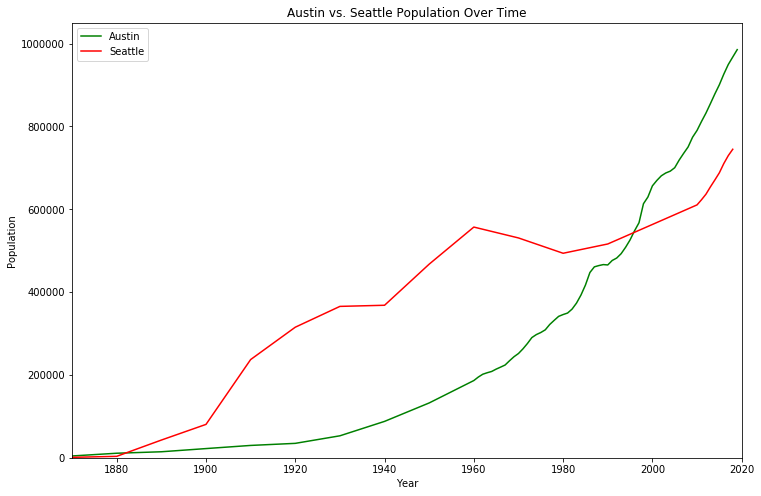

In [2]:
# Austin population data from 
# http://www.austintexas.gov/sites/default/files/files/Planning/Demographics/population_history_pub_2019.pdf

path_atx_pop = '../Resources/Quick_pop_data/austin_pop.csv'
pop_data = pd.DataFrame(pd.read_csv(path_atx_pop))
pop_data.columns = 'Year','Population','Growth Rate'

austin_year = []
austin_pop = []
for index, row in pop_data.iterrows():
    austin_year.append(row['Year'])
    austin_pop.append(row['Population'])

# CSV info from https://worldpopulationreview.com/us-cities/seattle-population/
path_swa_pop = '../Resources/Quick_pop_data/seattle_pop.csv'
seattle_pop_df = pd.DataFrame(pd.read_csv(path_swa_pop)).sort_values('Year')
seattle_pop_df.head()

seattle_year = []
seattle_pop = []
for index, row in seattle_pop_df.iterrows():
    seattle_year.append(row['Year'])
    seattle_pop.append(row['Population'])
    
plt.figure(figsize=(12,8))
plt.plot(austin_year,austin_pop,c='g',label='Austin')
plt.plot(seattle_year,seattle_pop,c='r',label='Seattle')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Austin vs. Seattle Population Over Time')
plt.xlim(1870,2020)
plt.ylim(0,1050000)
plt.legend()
# plt.savefig('../Output_data/homeless_sheltered.png', dpi=100)

# Where construction is happening (2008-2018)

In [3]:
# A dataframe to get coordinates from zip codes
# Lat, Lng data from https://public.opendatasoft.com
path = '../Resources/GeoData/us-zip-code-latitude-and-longitude.csv'
zip_data = pd.DataFrame(pd.read_csv(path, index_col=False))
zip_data = zip_data.drop(columns=['Timezone','Daylight savings time flag','geopoint'])
zip_data.head()

,Zip,City,State,Latitude,Longitude
0,71937,Cove,AR,34.398483,-94.39398
1,72044,Edgemont,AR,35.624351,-92.16056
2,56171,Sherburn,MN,43.660847,-94.74357
3,49430,Lamont,MI,43.010337,-85.89754
4,52585,Richland,IA,41.194129,-91.98027


In [4]:
path2 = '../Resources/GeoData/permits_by_zip.csv'

permits = pd.DataFrame(pd.read_csv(path2, header=None))

permits = permits.rename(columns = {0:'Zip', 1:'Permits Issued (2008-2018)'})

permits.head()

,Zip,Permits Issued (2008-2018)
0,78704.0,44889
1,78745.0,34643
2,78748.0,31675
3,78723.0,29773
4,78703.0,28982


In [5]:
permits_zip = pd.merge(permits, zip_data, on='Zip',how='left')

permits_zip.head()

,Zip,Permits Issued (2008-2018),City,State,Latitude,Longitude
0,78704.0,44889,Austin,TX,30.246309,-97.76087
1,78745.0,34643,Austin,TX,30.207559,-97.79575
2,78748.0,31675,Austin,TX,30.172020,-97.82265
3,78723.0,29773,Austin,TX,30.306507,-97.68651
4,78703.0,28982,Austin,TX,30.290907,-97.76277


In [6]:
path3 = '../Resources/Zillow_data/Zip_Zri_AllHomesPlusMultifamily_Summary.csv'

rent_df = pd.DataFrame(pd.read_csv(path3))

rent_df.head()

,Date,RegionName,State,Metro,County,City,SizeRank,Zri,MoM,QoQ,YoY,ZriRecordCnt
0,2020-01-31,60657,IL,Chicago-Naperville-Elgin,Cook County,Chicago,0,1996,-0.0278,-0.0610,-0.0146,32023
1,2020-01-31,77494,TX,Houston-The Woodlands-Sugar Land,Harris County,Katy,1,1778,0.0013,0.0079,0.0022,43054
2,2020-01-31,77449,TX,Houston-The Woodlands-Sugar Land,Harris County,Katy,2,1443,-0.0071,0.0247,0.0179,41100
3,2020-01-31,10002,NY,New York-Newark-Jersey City,New York County,New York,3,3605,-0.0139,-0.0316,0.0223,12425
4,2020-01-31,77084,TX,Houston-The Woodlands-Sugar Land,Harris County,Houston,4,1438,0.0013,0.0122,0.0216,31001


In [7]:
geocords = []
permit_count = []

for index, row in permits_zip.iterrows():
    geocords.append((row['Latitude'], row['Longitude']))
    permit_count.append(row['Permits Issued (2008-2018)'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(geocords,permit_count, point_radius = 15))
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

# Tax data

In [8]:
path_tax_2011 = '../resources/Tax_Data/IRS_Zip_2011.csv'

tax_df_2011 = pd.DataFrame(pd.read_csv(path_tax_2011))

tax_df_2011 = tax_df_2011.rename(columns={'ZIPCODE':'Zip',
                                'agi_stub':'Tax Bracket',
                                'N1':'Number of Returns (2011)',
                                'N2':'Number of Exemptions (2011)',
                                'A00100':'Adjusted Gross Income (AGI) (2011)'})

tax_df_2011 = tax_df_2011.loc[tax_df_2011['STATE']=='TX']

path_tax_2017 = '../resources/Tax_Data/IRS_Zip_2017.csv'

tax_df_2017 = pd.DataFrame(pd.read_csv(path_tax_2017))

tax_df_2017 = tax_df_2017.rename(columns={'zipcode':'Zip',
                                'agi_stub':'Tax Bracket',
                                'N1':'Number of Returns (2017)',
                                'N2':'Number of Exemptions (2017)',
                                'A00100':'Adjusted Gross Income (AGI) (2017)'})

tax_df_2017 = tax_df_2017.loc[tax_df_2017['STATE']=='TX']

In [9]:
atx_zips = [78610, 78613, 78617, 78641, 78652, 78653, 
            78660, 78664, 78681, 78701, 78702, 78703, 
            78704, 78705, 78712, 78717, 78719, 78721, 
            78722, 78723, 78724, 78725, 78726, 78727, 
            78728, 78729, 78730, 78731, 78732, 78733, 
            78734, 78735, 78736, 78737, 78738, 78739, 
            78741, 78742, 78744, 78745, 78746, 78747, 
            78748, 78749, 78750, 78751, 78752, 78753, 
            78754, 78756, 78757, 78758, 78759]

tax_bracks_2011 = {}
agi_2011 = {}

for index, row in tax_df_2011.iterrows():
    
    if row['Zip'] in atx_zips:
        
        if row['Zip'] not in tax_bracks_2011:

            tax_bracks_2011[row['Zip']] = {}
            agi_2011[row['Zip']] = {}

            if row['Tax Bracket'] == 1.0:
                tax_bracks_2011[row['Zip']]['<$25,000'] = (row['Number of Returns (2011)']+row['Number of Exemptions (2011)'])
                agi_2011[row['Zip']]['<$25,000'] = row['Adjusted Gross Income (AGI) (2011)']


        else:


            if row['Tax Bracket'] == 2.0:
                tax_bracks_2011[row['Zip']]['$50,000'] = (row['Number of Returns (2011)']+row['Number of Exemptions (2011)'])
                agi_2011[row['Zip']]['$50,000'] = row['Adjusted Gross Income (AGI) (2011)']
            elif row['Tax Bracket'] == 3.0:
                tax_bracks_2011[row['Zip']]['$75,000'] = (row['Number of Returns (2011)']+row['Number of Exemptions (2011)'])
                agi_2011[row['Zip']]['$75,000'] = row['Adjusted Gross Income (AGI) (2011)']
            elif row['Tax Bracket'] == 4.0:
                tax_bracks_2011[row['Zip']]['$100,000'] = (row['Number of Returns (2011)']+row['Number of Exemptions (2011)'])
                agi_2011[row['Zip']]['$100,000'] = row['Adjusted Gross Income (AGI) (2011)']
            elif row['Tax Bracket'] == 5.0:
                tax_bracks_2011[row['Zip']]['$200,000'] = (row['Number of Returns (2011)']+row['Number of Exemptions (2011)'])
                agi_2011[row['Zip']]['$200,000'] = row['Adjusted Gross Income (AGI) (2011)']
            elif row['Tax Bracket'] == 6.0:
                tax_bracks_2011[row['Zip']]['$200,000<'] = (row['Number of Returns (2011)']+row['Number of Exemptions (2011)'])
                agi_2011[row['Zip']]['$200,000<'] = row['Adjusted Gross Income (AGI) (2011)']            

In [10]:
tax_bracks_2017 = {}
agi_2017 = {}

for index, row in tax_df_2017.iterrows():
    
    if row['Zip'] in atx_zips:


        if row['Zip'] not in tax_bracks_2017:

            tax_bracks_2017[row['Zip']] = {}
            agi_2017[row['Zip']] = {}

            if row['Tax Bracket'] == 1.0:
                tax_bracks_2017[row['Zip']]['<$25,000'] = (row['Number of Returns (2017)']+row['Number of Exemptions (2017)'])
                agi_2017[row['Zip']]['<$25,000'] = row['Adjusted Gross Income (AGI) (2017)']

        else:


            if row['Tax Bracket'] == 2.0:
                tax_bracks_2017[row['Zip']]['$50,000'] = (row['Number of Returns (2017)']+row['Number of Exemptions (2017)'])
                agi_2017[row['Zip']]['$50,000'] = row['Adjusted Gross Income (AGI) (2017)']
            elif row['Tax Bracket'] == 3.0:
                tax_bracks_2017[row['Zip']]['$75,000'] = (row['Number of Returns (2017)']+row['Number of Exemptions (2017)'])
                agi_2017[row['Zip']]['$75,000'] = row['Adjusted Gross Income (AGI) (2017)']
            elif row['Tax Bracket'] == 4.0:
                tax_bracks_2017[row['Zip']]['$100,000'] = (row['Number of Returns (2017)']+row['Number of Exemptions (2017)'])
                agi_2017[row['Zip']]['$100,000'] = row['Adjusted Gross Income (AGI) (2017)']
            elif row['Tax Bracket'] == 5.0:
                tax_bracks_2017[row['Zip']]['$200,000'] = (row['Number of Returns (2017)']+row['Number of Exemptions (2017)'])
                agi_2017[row['Zip']]['$200,000'] = row['Adjusted Gross Income (AGI) (2017)']
            elif row['Tax Bracket'] == 6.0:
                tax_bracks_2017[row['Zip']]['$200,000<'] = (row['Number of Returns (2017)']+row['Number of Exemptions (2017)'])
                agi_2017[row['Zip']]['$200,000<'] = row['Adjusted Gross Income (AGI) (2017)'] 

In [11]:
brackets = ['<$25,000','$50,000','$75,000','$100,000','$200,000','$200,000<']

atx_tax_2011 = pd.DataFrame(data=tax_bracks_2011)
atx_tax_2011['Total Returns and Exemptions'] = atx_tax_2011.sum(axis=1)
atx_tax_2011 = atx_tax_2011.T
atx_tax_2011 = atx_tax_2011[brackets].reset_index()
atx_tax_2011 = atx_tax_2011.rename(columns={'index':'Zip'}).set_index('Zip')

atx_tax_2017 = pd.DataFrame(data=tax_bracks_2017)
atx_tax_2017['Total Returns and Exemptions'] = atx_tax_2017.sum(axis=1)
atx_tax_2017 = atx_tax_2017.T
atx_tax_2017 = atx_tax_2017[brackets].reset_index()
atx_tax_2017 = atx_tax_2017.rename(columns={'index':'Zip'}).set_index('Zip')

atx_agi_2011 = pd.DataFrame(data=agi_2011)
atx_agi_2011['Total AGI'] = atx_agi_2011.sum(axis=1)
atx_agi_2011 = atx_agi_2011.T
atx_agi_2011 = atx_agi_2011[brackets].reset_index()
atx_agi_2011 = atx_agi_2011.rename(columns={'index':'Zip'}).set_index('Zip')

atx_agi_2017 = pd.DataFrame(data=agi_2017)
atx_agi_2017['Total AGI'] = atx_agi_2017.sum(axis=1)
atx_agi_2017 = atx_agi_2017.T
atx_agi_2017 = atx_agi_2017[brackets].reset_index()
atx_agi_2017 = atx_agi_2017.rename(columns={'index':'Zip'}).set_index('Zip')

atx_tax_2017 = atx_tax_2017.drop_duplicates()

atx_tax_2017.head()

,"<$25,000","$50,000","$75,000","$100,000","$200,000","$200,000<"
Zip,,,,,,
78610,10200.0,12430.0,9330.0,8430.0,13430.0,2880.0
78613,19060.0,19280.0,15010.0,13760.0,33910.0,15060.0
78617,11500.0,12170.0,5760.0,2450.0,1560.0,170.0
78641,16780.0,17250.0,14630.0,13670.0,27330.0,9990.0
78652,1460.0,1530.0,1210.0,1070.0,1800.0,410.0


# Changes in income (2011 vs. 2017)

Total 2011 returns and Exemptions: 1852682.0
Total 2017 returns and Exemptions: 2103540.0


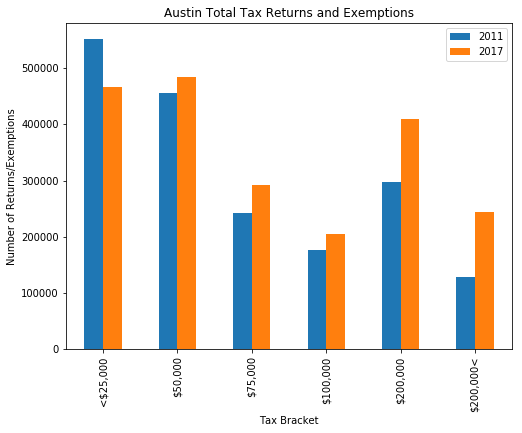

In [12]:
total_tax = pd.DataFrame({'2011':atx_tax_2011.loc['Total Returns and Exemptions'],
                          '2017':atx_tax_2017.loc['Total Returns and Exemptions']})
total_tax.plot(kind='bar',figsize=(8,6))
title = 'Austin Total Tax Returns and Exemptions'
plt.title(title)
plt.xlabel('Tax Bracket')
plt.ylabel('Number of Returns/Exemptions')
print(f'Total 2011 returns and Exemptions: {round(total_tax["2011"].sum(),0)}')
print(f'Total 2017 returns and Exemptions: {total_tax["2017"].sum()}')
plt.savefig(f'../Output_Data/{title}.png',dpi=100)

Total 2011 adjusted gross income: 44715147.0
Total 2017 adjusted gross income: 72144341.0


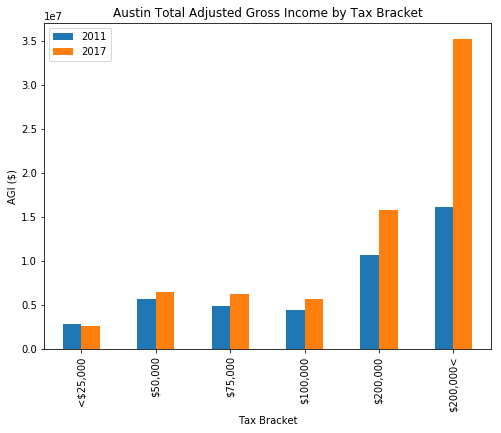

In [13]:
total_agi = pd.DataFrame({'2011':atx_agi_2011.loc['Total AGI'],'2017':atx_agi_2017.loc['Total AGI']})
total_agi.plot(kind='bar',figsize=(8,6))
title = 'Austin Total Adjusted Gross Income by Tax Bracket'
plt.title(title)
plt.ylabel('AGI ($)')
plt.xlabel('Tax Bracket')
print(f'Total 2011 adjusted gross income: {round(total_agi["2011"].sum(),0)}')
print(f'Total 2017 adjusted gross income: {total_agi["2017"].sum()}')
plt.savefig(f'../Output_Data/{title}.png',dpi=100)

# Income and demographic trends by zip code

In [17]:
path_pop = '../Resources/Census.gov/By_Year/Merged_datasets/Austin_population_merged_clean.csv'
demog_df = pd.DataFrame(pd.read_csv(path_pop))
demog_df = demog_df.rename(columns={'Zipcode':'Zip'})


path_pov = '../Resources/Census.gov/By_Year/Merged_datasets/Austin_poverty_merged_clean.csv'
pov_df = pd.DataFrame(pd.read_csv(path_pov))
pov_df = pov_df.rename(columns={'Zipcode':'Zip'})


path_edu = '../Resources/Census.gov/By_Year/Merged_datasets/Austin_education_merged_clean.csv'
edu_df = pd.DataFrame(pd.read_csv(path_edu))
edu_df = edu_df.rename(columns={'Zipcode':'Zip'})

housing_path = '../Resources/Census.gov/By_Year/Merged_datasets/Austin_housing_merged_clean.csv'
housing_df = pd.DataFrame(pd.read_csv(housing_path))
housing_df = housing_df.rename(columns={'Zipcode':'Zip'})

In [18]:
austin_geo_df = pd.merge(zip_data,demog_df,on='Zip',how='left')

austin_geo_df = pd.merge(austin_geo_df,pov_df,on='Zip',how='left')

austin_geo_df = pd.merge(austin_geo_df,edu_df,on='Zip',how='left')

austin_geo_df = pd.merge(austin_geo_df,housing_df,on='Zip',how='left')


austin_geo_df = austin_geo_df.dropna(how='any')

austin_geo_df = austin_geo_df.loc[austin_geo_df['Household Income_2011'] != -666666666.0]
austin_geo_df = austin_geo_df.loc[austin_geo_df['Household Income_2012'] != -666666666.0]
austin_geo_df = austin_geo_df.loc[austin_geo_df['Household Income_2013'] != -666666666.0]
austin_geo_df = austin_geo_df.loc[austin_geo_df['Household Income_2014'] != -666666666.0]
austin_geo_df = austin_geo_df.loc[austin_geo_df['Household Income_2015'] != -666666666.0]
austin_geo_df = austin_geo_df.loc[austin_geo_df['Household Income_2016'] != -666666666.0]
austin_geo_df = austin_geo_df.loc[austin_geo_df['Household Income_2017'] != -666666666.0]
austin_geo_df = austin_geo_df.loc[austin_geo_df['Household Income_2018'] != -666666666.0]





# austin_geo_df.to_csv('../Resources/All_2013_Census_Data.csv')

austin_geo_df.head()

,Zip,City,State,Latitude,Longitude,Median Age_2011,Population_2011,Population (White Alone)_2011,Population (Black Alone)_2011,Population (American Indian or Alaskan Native Alone)_2011,...,Median year housing units were built_2017,Median contract rent_2017,Median gross rent (contract rent plus utilities)_2017,Median value (dollars) for Owner-Occupied housing units_2017,Median Selected Monthly Owner Costs (Dollars) by Mortgage Status_2017,Median year housing units were built_2018,Median contract rent_2018,Median gross rent (contract rent plus utilities)_2018,Median value (dollars) for Owner-Occupied housing units_2018,Median Selected Monthly Owner Costs (Dollars) by Mortgage Status_2018
581,78701,Austin,TX,30.271270,-97.74103,33.1,5084.0,4097.0,397.0,0.0,...,2004.0,1755.0,1847.0,476700.0,3086.0,2004.0,1873.0,1950.0,435400.0,2680.0
1016,78705,Austin,TX,30.292424,-97.73856,20.8,29247.0,21882.0,976.0,62.0,...,1984.0,1124.0,1198.0,417800.0,2732.0,1984.0,1176.0,1238.0,444700.0,2788.0
1645,78727,Austin,TX,30.425652,-97.71419,31.6,28075.0,19598.0,2358.0,104.0,...,1993.0,1083.0,1219.0,249700.0,1738.0,1994.0,1141.0,1274.0,271200.0,1796.0
3209,78652,Manchaca,TX,30.128480,-97.84380,39.1,4256.0,3765.0,131.0,0.0,...,1991.0,1121.0,1231.0,239500.0,1698.0,2000.0,1242.0,1346.0,280100.0,1823.0
3643,78660,Pflugerville,TX,30.450122,-97.62300,31.6,67630.0,41989.0,10067.0,258.0,...,2002.0,1132.0,1312.0,198500.0,1626.0,2003.0,1202.0,1355.0,214600.0,1700.0


In [19]:
# Linear regression functions!

# A function to create linear regression plots
def regress(x, y, title, xlab, ylab):
    
    # Calculates linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    x = np.asarray(x, dtype=np.float64)
    regress_values = x * slope + intercept

    # Plots scatter plot and regresion
    plt.figure(figsize=(8, 6))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

    # Annotates graph with equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,xy=(min(x),min(y)),fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    
    plt.savefig(f'../Output_Data/{title}.png',dpi=100)

    # Prints r squared value from linregress function
    print(f'The r-squared is: {rvalue}')

    
# A function to create linear regression plots from DF based on user input   
def user_regress():
    
    x_topic = input('Enter a category: ')
    year = input('Enter a year: ')
    y_topic = input('Enter a second category to compare: ')
    
    x = austin_geo_df[(f'{x_topic}_{year}').title()]
    y = austin_geo_df[(f'{y_topic}_{year}').title()]
    
    title = (f'{x_topic} and {y_topic} in {year}')
    
    # Calculates linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    x = np.asarray(x, dtype=np.float64)
    regress_values = x * slope + intercept

    # Plots scatter plot and regresion
    plt.figure(figsize=(8, 6))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

    # Annotates graph with equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,xy=(min(x),min(y)),fontsize=15,color="red")
    plt.xlabel(x_topic.title())
    plt.ylabel(y_topic.title())
    plt.title(f'{title.title()} by Zip Code')
    
    plt.savefig(f'../Output_Data/{title}.png',dpi=100)

    # Prints r squared value from linregress function
    print(f'The r-squared is: {rvalue}')

In [22]:
# A function to plot a heatmap from cleaned census data based on user input
def user_heatmap():

    topic = input('Topic: ').title()
    year = input('Year (2011-2018): ')
    topic_year = (f'{topic}_{year}')
    austin_geocords = []
    topic_weight = []

    for index, row in austin_geo_df.iterrows():
        austin_geocords.append((row['Latitude'], row['Longitude']))
        topic_weight.append(row[topic_year])

    # Plot Heatmap
    figure_layout = {
        'width': '1000px',
        'height': '750px',
        'border': '1px solid black',
        'padding': '1px',
        'margin': '0 auto 0 auto'
    }
    fig = gmaps.figure(layout=figure_layout)

    fig.add_layer(gmaps.heatmap_layer(austin_geocords,topic_weight, point_radius = 20))
    
    # 'Fig' must come after calling the function

user_heatmap()
fig

Topic: Household Income
Year (2011-2018): 2018


Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

In [23]:
# A function to plot a heatmap from cleaned census data based
# 'Fig' must come after calling the function
def plot_heatmap(topic, year):

    topic_year = (f'{topic}_{year}')
    austin_geocords = []
    topic_weight = []

    for index, row in austin_geo_df.iterrows():
        austin_geocords.append((row['Latitude'], row['Longitude']))
        topic_weight.append(row[topic_year])

    # Plot Heatmap
    figure_layout = {
        'width': '1000px',
        'height': '750px',
        'border': '1px solid black',
        'padding': '1px',
        'margin': '0 auto 0 auto'
    }
    fig = gmaps.figure(layout=figure_layout)

    fig.add_layer(gmaps.heatmap_layer(austin_geocords,topic_weight, point_radius = 20))
    


### Household income (2011 vs. 2018)

In [24]:
austin_geocords = []
house_income_2011 = []
house_income_2012 = []
house_income_2018 = []


for index, row in austin_geo_df.iterrows():
    austin_geocords.append((row['Latitude'], row['Longitude']))
    house_income_2011.append(row['Household Income_2011'])
    house_income_2012.append(row['Household Income_2012'])
    house_income_2018.append(row['Household Income_2018'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,house_income_2011, point_radius = 20))

fig

# heatmap_layer.max_intensity = 100
# heatmap_layer.point_radius = 5

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

In [25]:
plot_heatmap('Household Income', '2018')
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

### Where people live (2011 vs. 2018)

In [26]:
nonwhite_2011 = []
white_2011 = []

for index, row in austin_geo_df.iterrows():
    white_2011.append(row['Population (White Alone)_2011'])
    nonwhite_2011.append(row['Population_2011'] - row['Population (White Alone)_2011'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,nonwhite_2011, point_radius = 20))
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

In [27]:
nonwhite_2018 = []
white_2018 = []

for index, row in austin_geo_df.iterrows():
    white_2018.append(row['Population (White Alone)_2018'])
    nonwhite_2018.append(row['Population_2018'] - row['Population (White Alone)_2018'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,nonwhite_2018, point_radius = 20))
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

### Household income by ethnicity (2011 vs. 2018)

The r-squared is: -0.381606970521929


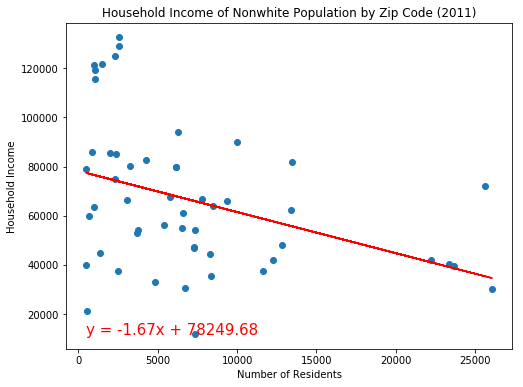

In [28]:
regress(nonwhite_2011, house_income_2011, 'Household Income of Nonwhite Population by Zip Code (2011)', 
        'Number of Residents', 'Household Income')

The r-squared is: 0.0516313706365884


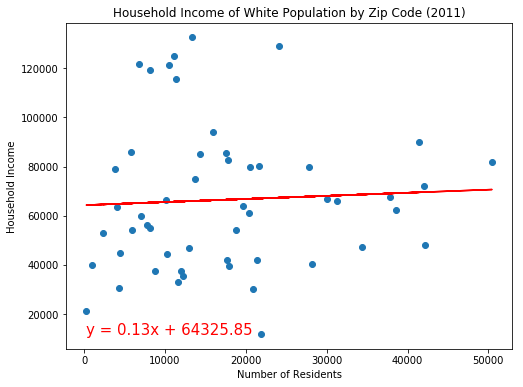

In [29]:
regress(white_2011, house_income_2011, 'Household Income of White Population by Zip Code (2011)', 
        'Number of Residents', 'Household Income')

The r-squared is: -0.37705264755797624


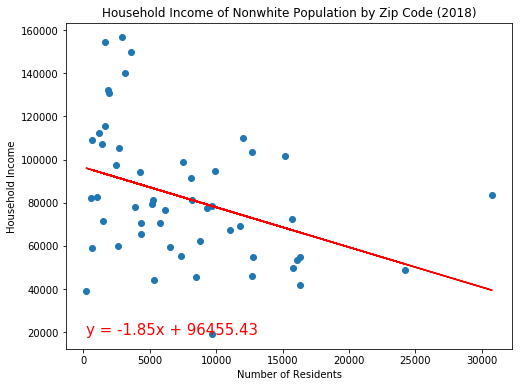

In [30]:
regress(nonwhite_2018, house_income_2018, 'Household Income of Nonwhite Population by Zip Code (2018)', 
        'Number of Residents', 'Household Income')

The r-squared is: -0.038390319022434415


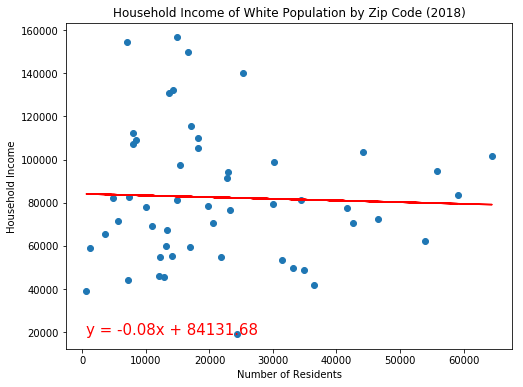

In [31]:
regress(white_2018, house_income_2018, 'Household Income of White Population by Zip Code (2018)', 
        'Number of Residents', 'Household Income')

### How old is Austin (2011 vs. 2018) 

In [32]:
plot_heatmap('Median Age', '2011')
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

In [33]:
plot_heatmap('Median Age', '2018')
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

### Where do college-educated residents live? (2012 vs. 2018)

In [34]:
college_2012 = []

for index, row in austin_geo_df.iterrows():
    college_2012.append(row["Education (Bachelor's)_2012"]+row["Education (Master's)_2012"]+row["Education (Doctorate)_2012"])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,college_2012, point_radius = 20))
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

In [35]:
college_2018 = []

for index, row in austin_geo_df.iterrows():
    college_2018.append(row["Education (Bachelor's)_2018"]+row["Education (Master's)_2018"]+row["Education (Doctorate)_2018"])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,college_2018, point_radius = 20))
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

### The relationship between education and household income (2012 vs. 2018)

The r-squared is: 0.27847375011109904


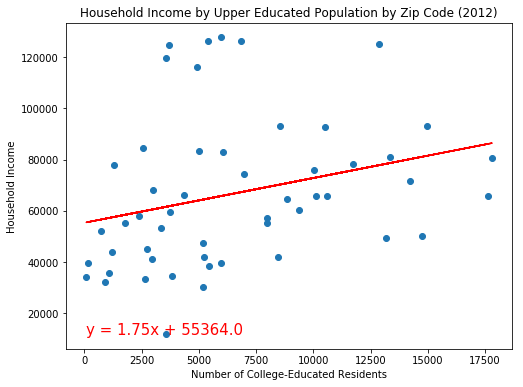

In [36]:
regress(college_2012, house_income_2012, 'Household Income by Upper Educated Population by Zip Code (2012)', 
        'Number of College-Educated Residents', 'Household Income')

The r-squared is: 0.19105398442122473


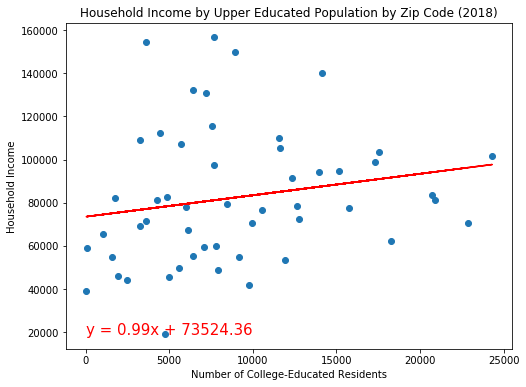

In [37]:
regress(college_2018, house_income_2018, 'Household Income by Upper Educated Population by Zip Code (2018)', 
        'Number of College-Educated Residents', 'Household Income')

### What areas of Austin are most impoverished? (2011 vs. 2018) 

In [38]:
plot_heatmap('Total Poverty Count', '2011')
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

In [39]:
plot_heatmap('Total Poverty Count', '2018')
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

### The relationship between ethnicity and poverty (2011 vs. 2018) 

The r-squared is: 0.8125944381386989


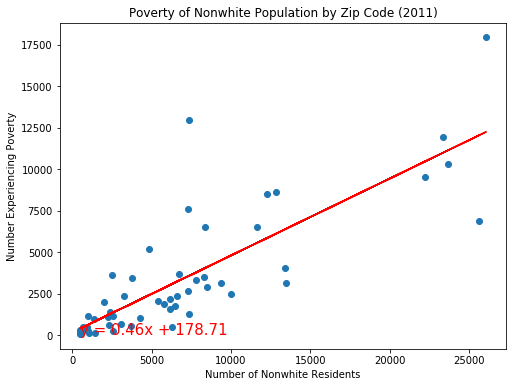

In [40]:
poverty_2018 = []
poverty_2011 = []

for index, row in austin_geo_df.iterrows():
    poverty_2011.append(row['Total Poverty Count_2011'])
    poverty_2018.append(row['Total Poverty Count_2018'])

regress(nonwhite_2011, poverty_2011, 'Poverty of Nonwhite Population by Zip Code (2011)', 
        'Number of Nonwhite Residents', 'Number Experiencing Poverty')

The r-squared is: 0.6939233287357905


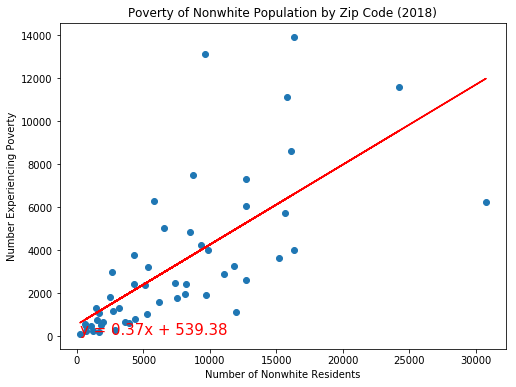

In [41]:
regress(nonwhite_2018, poverty_2018, 'Poverty of Nonwhite Population by Zip Code (2018)', 
        'Number of Nonwhite Residents', 'Number Experiencing Poverty')

Enter a category: Total Poverty Count
Enter a year: 2018
Enter a second category to compare: Household Income
The r-squared is: -0.6124458207596022


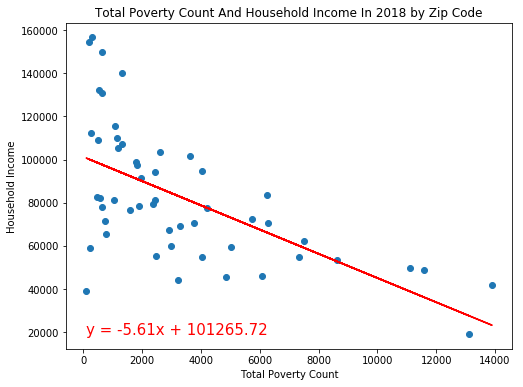

In [42]:
user_regress()

# What do Austinites do?

In [ ]:
#insert company information